In [1]:
import pandas as pd
import janitor, pyjviz

rdflog_fn = "conditional-join-w-cmp.ttl"
pyjviz.RDFLogger.init(rdflog_fn)

pf_pandas.py: register handle_pandas_method_call


/home/asmirnov/projects/pandas_flavor/pandas_flavor/register.py:40: UserWarning: registration of accessor <class 'pandas_flavor.register.register_dataframe_method.<locals>.inner.<locals>.AccessorMethod'> under name 'describe' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  register_dataframe_accessor(method.__name__)(AccessorMethod)
/home/asmirnov/projects/pandas_flavor/pandas_flavor/register.py:40: UserWarning: registration of accessor <class 'pandas_flavor.register.register_dataframe_method.<locals>.inner.<locals>.AccessorMethod'> under name 'drop' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  register_dataframe_accessor(method.__name__)(AccessorMethod)


In [2]:

df1 = pd.DataFrame({'id': [1,1,1,2,2,3], 'value_1': [2,5,7,1,3,4]})

df2 = pd.DataFrame({'id': [1,1,1,1,2,2,2,3],
                        'value_2A': [0,3,7,12,0,2,3,1],
                        'value_2B': [1,5,9,15,1,4,6,3]})

with pyjviz.MethodsChain("p1"):
    res1 = df1.conditional_join(df2,('id', 'id', "<"),
                                df_columns = {'id':'df_id'},
                                right_columns = {'id':'right_id'}
                                )
with pyjviz.MethodsChain("p2"):
    res2 = df1.select_columns('value_1').conditional_join(
                                df2.select_columns('val*'),
                                ('value_1', 'value_2A', '>'),
                                ('value_1', 'value_2B', '<'))

enter chain p1
handle_pandas_method_call 139910489178368
__call__ conditional_join
exit chain p1
enter chain p2
handle_pandas_method_call 139910489178368
__call__ select_columns
handle_pandas_method_call 139910488978288
__call__ select_columns
handle_pandas_method_call 139910489181968
__call__ conditional_join
obj deleted <weakref at 0x7f3f73026110; dead>
exit chain p2


obj deleted <weakref at 0x7f3f730258f0; dead>


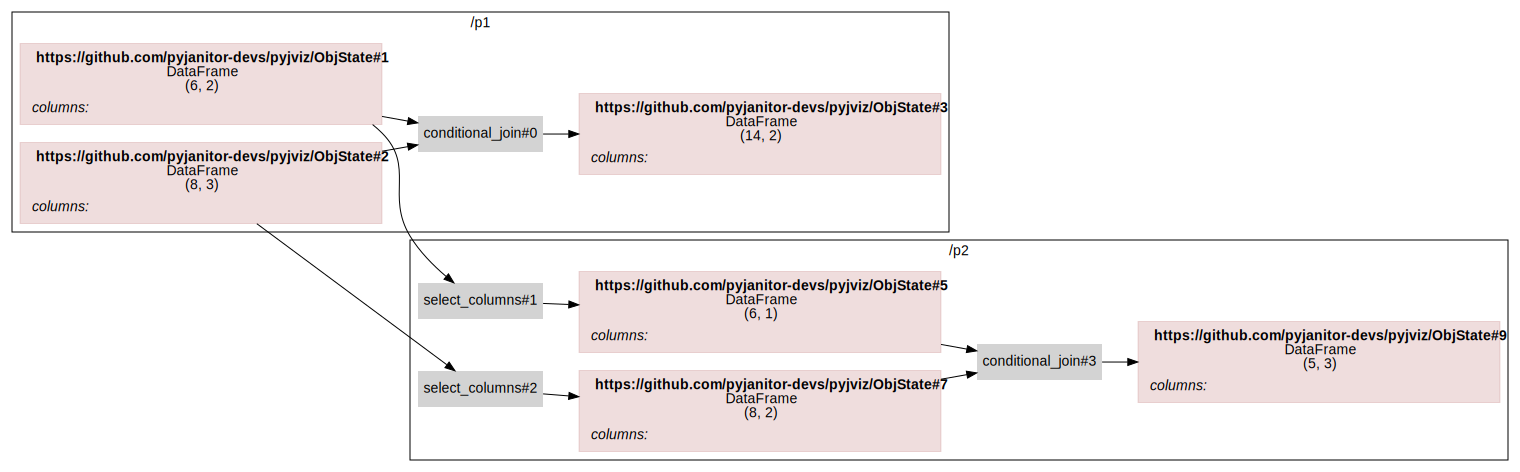

In [3]:
import graphviz 
from IPython.display import display
import rdflib

pyjviz.RDFLogger.flush()
g = rdflib.Graph()
g.parse(rdflog_fn)
dot_code = pyjviz.dump_dot_code(g, vertical = False, show_objects = False)

source = dot_code
#print(source)
gvz = graphviz.Source(source)
display(gvz)